In [3]:
import numpy as np
import matplotlib.pyplot as plt


### Least Square Method using Normal Equation Solution
### 正規方程式を用いて最小二乗法を行う

適当にランダムで線形データにノイズが乗ったようなものを作成する

In [16]:
X = 2 * np.random.rand(100, 1) #  Randomize with a Uniform Distribution 
y  = 4 + 3 *X + np.random.randn(100, 1) # Randomize with a Normalized Distribution, Y = 4 + 3X + Noise

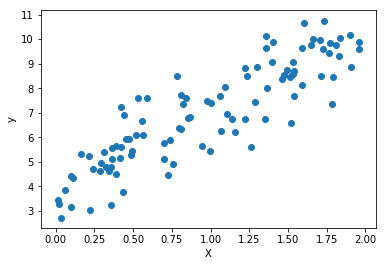

In [17]:
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [18]:
X_b = np.c_[np.ones((100, 1)), X] # Add 1 to heads of each row of X. This is constant term which equivalent to b of y= ax + b
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print(theta_best)

[[3.93908872]
 [3.12211224]]


真値は4, 3なのでまあまあ近い。<br>
次に、予測結果をplotしてみる。

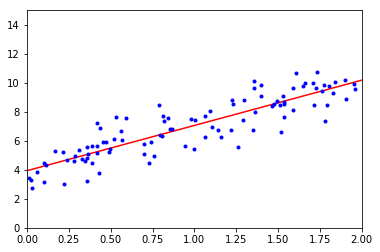

In [22]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b.')
plt.axis([0,2, 0, 15])
plt.show()

いい感じに回帰できてる<br>
いま自分でコードを書いたけど、scikit-learnなら次のようになる

In [24]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y) # fit method returns Bias Param to ingercept_ member variable, and other Weights to coef_ member variable
print(lin_reg.intercept_, lin_reg.coef_)

[3.93908872] [[3.12211224]]


手で書いたやつと同じ結果になった。<br>
予測をするならこちら、先ほどのグラフの赤線の左端と右端になるはず。

In [25]:
print(lin_reg.predict(X_new))

[[ 3.93908872]
 [10.1833132 ]]



正規方程式の特徴：<br>
① 特徴量の数nに対して$O(n^2)$<br>
② サンプルデータ数mに対して$O(m)$<br>
→ 特徴量やサンプル数が非常に多い場合は正規方程式は向かない、その場合は勾配法を使う


### Gradient Descent
### 勾配法

Deep Learningでも使ってる方法<br>
線形回帰に最小二乗誤差（Mean Square Error, MSE）を適用する時凸関数であることが保証されている→ 学習率が十分小さく長い時間計算して良いなら必ず大域的最適解に収束する

Batch Gradient Descent<br>
バッチ勾配降下法 データ全部使う

In [26]:
eta = 0.1 # Learning Rate
n_iterations = 1000
m = 100 # Number of Samples 

theta = np.random.randn(2,1) # Initialize Parameters with a Normal Distribution

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y) # This gradient is from MSE definition
    theta = theta - eta * gradients

print(theta)

[[3.93908872]
 [3.12211224]]


正規方程式で見つけた最適解と一致した→ 勾配法が正しく機能した

Stocastic Gradient Descent (SGD)<br>
確率的勾配降下法<br>

データがめちゃくちゃ多くなると全部のデータ見てパラメータ更新するのは時間がかかりすぎる。そこでサンプル一つにつき更新を行う。<br>
サンプル一つずつ重みを更新するため、全体のコスト関数は上下を繰り返す。BGDなら必ず下がったが。。。<br>
そうすると最適値付近でも値が暴れるので、学習率を少しずつ下げたりしたい。（学習スケジュール）

In [29]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m) # random int number within 0 ~ m
        xi = X_b[random_index: random_index+1]
        yi = y[random_index: random_index + 1]
        
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta*gradients


print(theta)

[[3.96089974]
 [3.13436185]]


結構ぶれてるけど近い<br>
これも同様にscikit-learnで書いてみると

In [32]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(n_iter=50, penalty=None, eta0=0.1) # penalty is a parameter for regulatization, and the learning schedule is default one
sgd_reg.fit(X, y.ravel()) # ravel is a method like flatten
print(sgd_reg.intercept_, sgd_reg.coef_)

[3.89770222] [3.08898499]


/Users/yossy/.pyenv/versions/3.6.2/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:117: DeprecationWarning: n_iter parameter is deprecated in 0.19 and will be removed in 0.21. Use max_iter and tol instead.
  DeprecationWarning)


ミニバッチ勾配降下法もscikit-learnにはある。BGDとSGDの中間。

### Polynomial Regression
### 多項式回帰

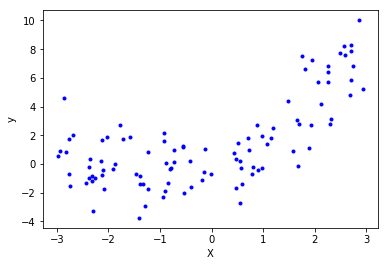

In [134]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2*np.random.randn(m,1)

plt.plot(X, y, 'b.')
plt.xlabel('X')
plt.ylabel('y')

plt.show()

In [135]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree = 2, include_bias = False) # Choose degree of polynomial
X_poly = poly_features.fit_transform(X)
print(X[0]) # Data
print(X_poly[0]) # Calculated Polynomial Feature

[1.81535691]
[1.81535691 3.29552071]


生データXに対して高次の特徴量X_polyが計算されている<br>
回帰の計算方法は特徴量が増えても変わらないので、後のコードは線形回帰の時と同じ

In [136]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print(lin_reg.intercept_, lin_reg.coef_)

[-0.24939518] [[1.16083262 0.55721294]]


真値はそれぞれ[0, 1, 0.5]なのでまあこんなもんかという感じ<br>
過学習させるのが簡単なのでやってみる

In [137]:
poly_features_over = PolynomialFeatures(degree = 30, include_bias = False) # Choose degree of polynomial
X_poly_over = poly_features_over.fit_transform(X)
lin_reg_over = LinearRegression()
lin_reg_over.fit(X_poly_over, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

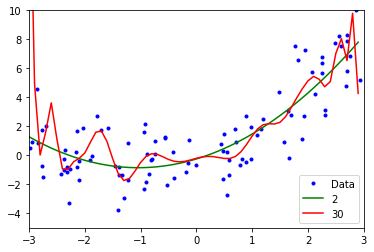

In [142]:
X_new = np.reshape(np.arange(-3, 3, 0.1), [60, 1])
y_predict = lin_reg.predict(poly_features.fit_transform(X_new))
y_predict_over = lin_reg_over.predict(poly_features_over.fit_transform(X_new))
plt.plot(X, y, 'b.')
plt.plot(X_new, y_predict, 'g')
plt.plot(X_new, y_predict_over, 'r')
plt.ylim([-5, 10])
plt.xlim([-3, 3])
plt.legend(('Data', '2', '30'))
plt.show()

さすがに30次の多項式では過学習してる

一般に過学習をどうやって判断するか？<br>
→ 与えるデータが増えた時にほとんど成績に変化がなければ、過小適合<br>
→ Training set と Validation setのさが大きければ過学習

ここでデータを増やした時にどれだけLossが下がるか見る関数を定義

In [162]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict, y_val))
    plt.plot(np.sqrt(train_errors), 'r', label='train')
    plt.plot(np.sqrt(val_errors), 'b', label='val')
    plt.legend(('train', 'val'))
    plt.xlabel('Training set size')
    plt.ylabel('RMSE')
    plt.ylim([0, 4])
    

これを使ってとりあえず線形回帰で確認してみる

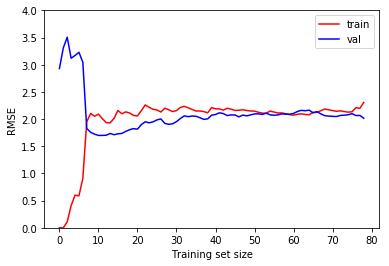

In [180]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

いつもみている学習曲線とは違うので注意。これは横軸がデータのサイズである。Deep Learning系は計算が重いので、この方法は使わないのだと思われる。<br>
しかし、パラメータが少ない対象への機械学習ならこの方法が有効と考える。<br>
この例ではデータ量が増加してもLossは下がらず、またTrainとValidationの差が無い。従って、過小適合していると考えられる。


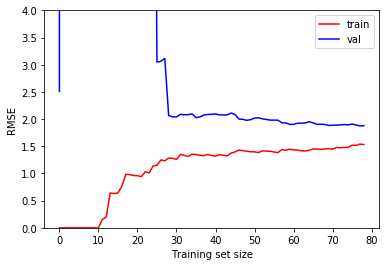

In [193]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias = False)), 
    ("lin_reg", LinearRegression())
])

plot_learning_curves(polynomial_regression, X, y)

データサイズが大きくなるとtrainとvalの差がなくなっている→ 汎化性能が向上している→ データを増やせば性能が上がる